In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [54]:
!gdown 1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU

Downloading...
From: https://drive.google.com/uc?id=1GVhrh2rH6hUunV4Tf7lQoSFsqov9aPjU
To: /content/healthyfime_tfkeras.csv
100% 762k/762k [00:00<00:00, 59.7MB/s]


In [55]:
df =pd.read_csv("healthyfime_tfkeras.csv")
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [57]:
df["gender"].value_counts()

,count
gender,
M,8467
F,4926


In [58]:
def encode(x):
    if x == "M":
        return 1
    else:
        return 0

In [59]:
df["gender"] = df["gender"].apply(encode);
df.tail()
# OR DO
#df.replace({"M":0, "F":1} , inplace = True)
#df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
13388,25.0,1,172.1,71.8,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,1,179.7,63.9,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,1,177.2,80.5,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,0,146.1,57.7,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D
13392,34.0,1,164.0,66.1,19.5,82.0,150.0,35.9,7.1,51.0,180.0,C


In [60]:
classes = list(df["class"].unique())
mapping_dict={ch:i for i,ch in enumerate(sorted(classes,reverse=True))}
print(mapping_dict)
df["class"].replace(mapping_dict,inplace=True)
df.head()

{'D': 0, 'C': 1, 'B': 2, 'A': 3}


<ipython-input-60-120e14a124a8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["class"].replace(mapping_dict,inplace=True)
<ipython-input-60-120e14a124a8>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["class"].replace(mapping_dict,inplace=True)


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,1
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,3
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,1
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,2
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,2


In [61]:
df["class"].value_counts() #we have a very balanced dataset

,count
class,
1,3349
0,3349
3,3348
2,3347


<Axes: >

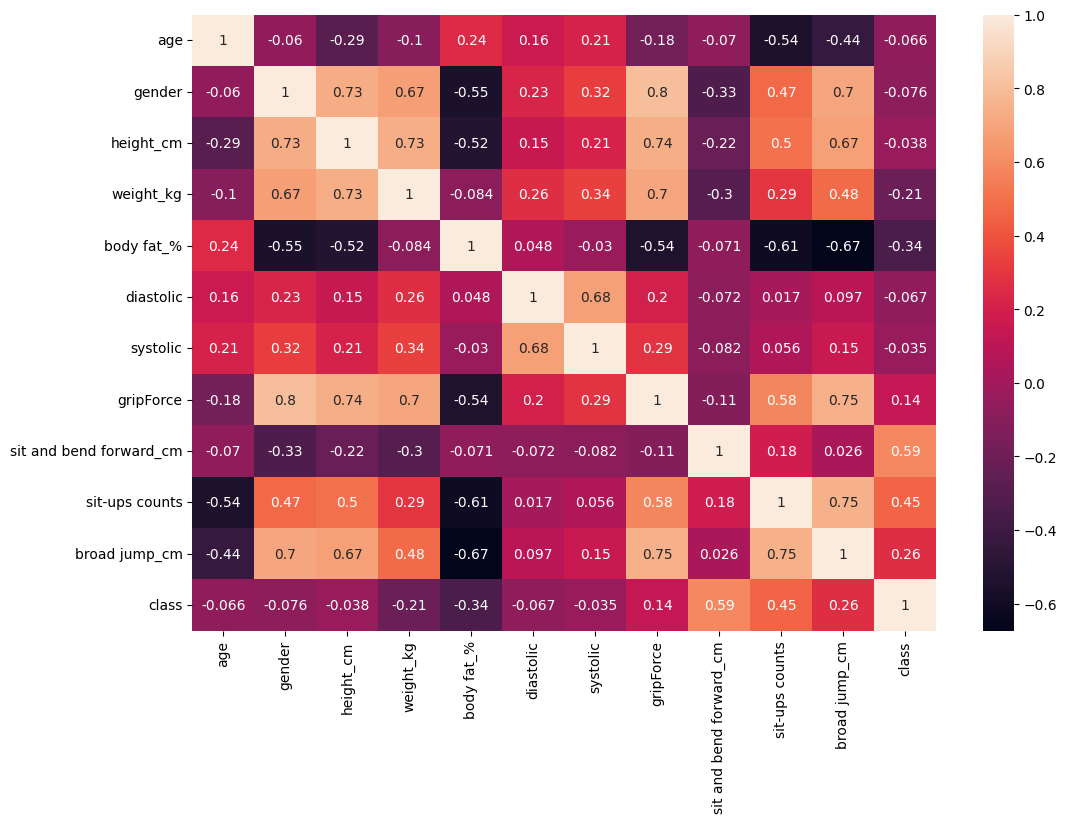

In [62]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<Axes: >

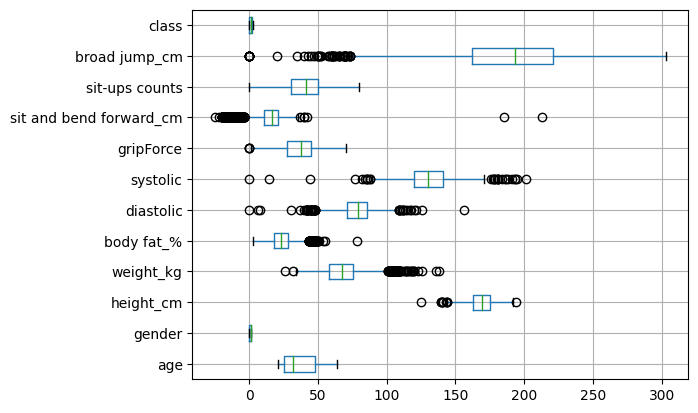

In [63]:
df.boxplot(vert=False)

In [64]:
df.shape

(13393, 12)

In [65]:
x,y = df.iloc[:,:-1],df.iloc[:,-1]
print(x.shape,y.shape)

(13393, 11) (13393,)


In [66]:
from sklearn.model_selection import train_test_split
x_dev,x_test,y_dev,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_dev.shape,x_test.shape,y_dev.shape,y_test.shape)

(10714, 11) (2679, 11) (10714,) (2679,)


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x_dev)

array([[-7.21992985e-01,  7.66788772e-01,  6.25421007e-01, ...,
         8.68582288e-01,  7.21783770e-01, -2.49036685e-02],
       [-1.08833033e+00, -1.30414012e+00, -9.23589813e-01, ...,
         2.02639358e+00, -3.31966375e-01, -1.18071006e+00],
       [ 8.89891333e-01, -1.30414012e+00, -2.20063690e+00, ...,
         4.74687724e-01, -2.22871663e+00, -1.05507893e+00],
       ...,
       [-7.21992985e-01, -1.30414012e+00, -1.27802713e-03, ...,
         7.37284100e-01,  5.11033741e-01, -2.00787249e-01],
       [-1.16159780e+00, -1.30414012e+00,  1.16967074e-01, ...,
         6.05985912e-01,  2.30033702e-01, -6.02806862e-01],
       [-1.08833033e+00,  7.66788772e-01,  4.24404336e-01, ...,
         1.76282752e-01,  1.42428387e+00,  8.79640461e-01]])

In [68]:
x_dev = scaler.transform(x_dev)
x_test = scaler.transform(x_test)

In [69]:
x_dev = pd.DataFrame(x_dev,columns=x.columns) #though we will be using numpy array for nn purpose
x_test = pd.DataFrame(x_test,columns=x.columns)

<Axes: >

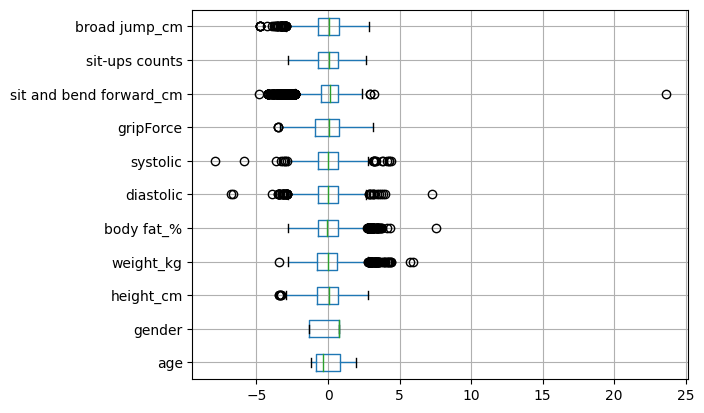

In [70]:
x_dev.boxplot(vert=False)

In [71]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [72]:
dir(tf.keras)

['DTypePolicy',
 'FloatDTypePolicy',
 'Function',
 'Initializer',
 'Input',
 'InputSpec',
 'KerasTensor',
 'Layer',
 'Loss',
 'Metric',
 'Model',
 'Operation',
 'Optimizer',
 'Quantizer',
 'Regularizer',
 'Sequential',
 'StatelessScope',
 'Variable',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'config',
 'constraints',
 'datasets',
 'device',
 'distribution',
 'dtype_policies',
 'export',
 'initializers',
 'layers',
 'legacy',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'name_scope',
 'ops',
 'optimizers',
 'preprocessing',
 'quantizers',
 'random',
 'regularizers',
 'tree',
 'utils',
 'version']

In [73]:
dir(tf.keras.activations)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'hard_silu',
 'hard_swish',
 'leaky_relu',
 'linear',
 'log_softmax',
 'mish',
 'relu',
 'relu6',
 'selu',
 'serialize',
 'sigmoid',
 'silu',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [74]:
dir(tf.keras.optimizers)

['Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'Ftrl',
 'Lion',
 'LossScaleOptimizer',
 'Nadam',
 'Optimizer',
 'RMSprop',
 'SGD',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'deserialize',
 'get',
 'legacy',
 'schedules',
 'serialize']

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense #All the layers we have seen till now are dense layer(Fully connected NN)

In [76]:
#Style 1:(Much Cleaner)
model = Sequential([ #here we will be will be providing a list of layers to the model to  the sequence
        Dense(100,activation="relu",input_shape=(11,)),
        Dense(4,activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
model.__dict__.keys()

dict_keys(['_tracker', '_self_setattr_tracking', '_trainable_variables', '_non_trainable_variables', '_layers', '_metrics', '_seed_generators', '_lock', '_auto_config', 'build', '_run_eagerly', '_jit_compile', 'compiled', 'loss', 'steps_per_execution', '_initial_epoch', '_compute_loss_has_training_arg', 'train_function', 'test_function', 'predict_function', '_distribute_strategy', '_saved_model_inputs_spec', '_saved_model_arg_spec', '_tracked', '_dtype_policy', 'name', '_inbound_nodes', '_outbound_nodes', 'activity_regularizer', '_path', 'built', 'autocast', '_input_spec', '_called', 'supports_jit', '_trainable', '_losses', '_loss_ids', '_losses_override', '_call_signature', '_call_has_training_arg', '_call_has_mask_arg', '_supports_masking', '_convert_input_args', '_allow_non_tensor_positional_args', '_build_shapes_dict', '_parent_path', '_functional', '_self_unconditional_checkpoint_dependencies', '_self_unconditional_dependency_names', '_self_unconditional_deferred_dependencies', '_

In [78]:
type(model.weights)

list

In [79]:
model.weights

[<KerasVariable shape=(11, 100), dtype=float32, path=sequential_5/dense_6/kernel>,
 <KerasVariable shape=(100,), dtype=float32, path=sequential_5/dense_6/bias>,
 <KerasVariable shape=(100, 4), dtype=float32, path=sequential_5/dense_7/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_5/dense_7/bias>]

In [80]:
for params in model.weights:
    print(params.name,params.shape)

kernel (11, 100)
bias (100,)
kernel (100, 4)
bias (4,)


# Alternative way

In [81]:
#Style 2:(More Dynamic)
model = Sequential()
model.add(Dense(100,activation="relu",input_shape=(11,),name="Hidden"))
model.add(Dense(4,activation="softmax",name="Output"))

***Note: -Style 2 is used when addition of a layer in the conditional ie.it depens of the value of something***

***-Also it will be benifitial when we are adding multiple layer(we can just run a loop) ***


In [82]:
model.summary() #It is showing none because we will be passing the value of m later as per the requirment(batch or mini batch or SGD)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden (Dense)                       │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 4)                   │             404 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,604 (6.27 KB)

 Trainable params: 1,604 (6.27 KB)

 Non-trainable params: 0 (0.00 B)

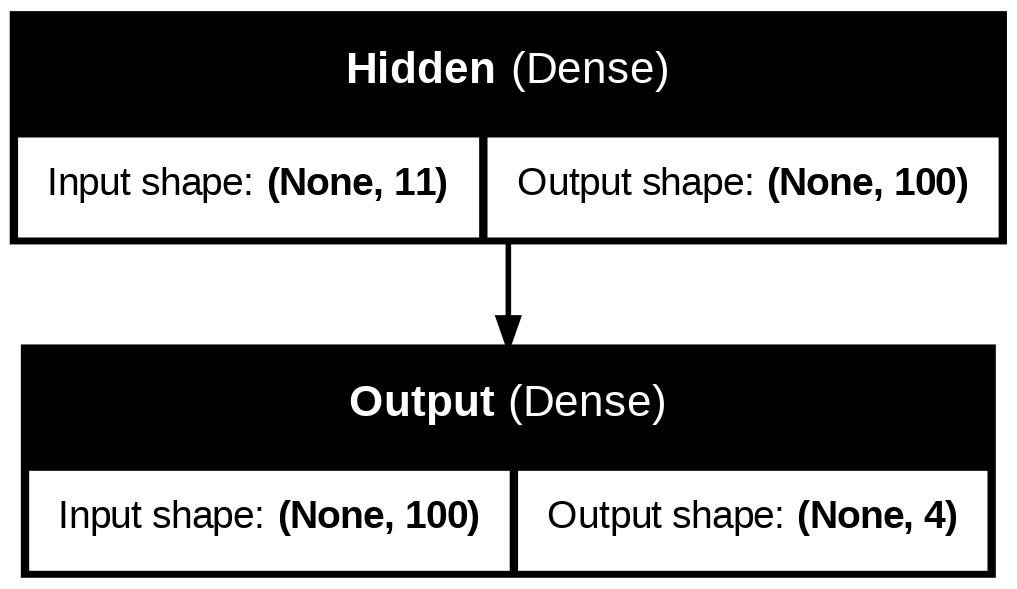

In [83]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file="model.png",show_shapes=True,show_layer_names=True)

In [84]:
#weights and bias
#weights -> randomly,multilple ways--> Glorot Normal,Glorot Uniform,HE Normal,HE Uniform
#bias -> zeros

In [109]:
model = Sequential()
model.add(Dense(100,activation="relu",input_shape=(11,),name="Hidden"
                    ,kernel_initializer="random_uniform",bias_initializer="zeros"))
model.add(Dense(4,activation="softmax",name="Output",kernel_initializer="he_normal",bias_initializer="ones"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
# Loss Function-->eec,sparse cce,mse,mae
# Optimiser-->adam ,rmsprop,agd......
# Metrics -> Loss and Accuracy
# Loss Function and optimiser with the model ->>model compilation

model_2c = Sequential([
        Dense(64,activation="relu",input_shape=(11,)),
        Dense(1,activation="sigmoid")
])

model_2c.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
#If we want to define in such  a way that we can make changes
model_2c.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)
                    ,loss=tf.keras.losses.BinaryCrossentropy(),metrics=["accuracy"])

In [113]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [108]:
model.fit(x_dev,y_dev,epochs=10,batch_size=256,validation_split=0.1,verbose=1)#verbose=0 will not print this

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6376 - loss: 0.8061 - val_accuracy: 0.6465 - val_loss: 0.8104
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6351 - loss: 0.8141 - val_accuracy: 0.6474 - val_loss: 0.8070
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6398 - loss: 0.8075 - val_accuracy: 0.6474 - val_loss: 0.7996
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6386 - loss: 0.7986 - val_accuracy: 0.6511 - val_loss: 0.7972
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6549 - loss: 0.7972 - val_accuracy: 0.6595 - val_loss: 0.7900
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6504 - loss: 0.7966 - val_accuracy: 0.6688 - val_loss: 0.7858
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6647 - loss: 0.7755 - val_accuracy: 0.6670 - val_loss: 0.7800
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6632 - loss: 0.7815 - val_accuracy: 0.6716 - val_loss:

In [100]:
(x_dev.shape[0]*0.9)/256 #

37.66640625

In [ ]:
#history(callbacks)

In [116]:
history = model.fit(x_dev,y_dev,epochs=500,batch_size=256,validation_split=0.1,verbose=1)

Epoch 1/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7766 - loss: 0.5442 - val_accuracy: 0.7351 - val_loss: 0.6421
Epoch 2/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7911 - loss: 0.5229 - val_accuracy: 0.7351 - val_loss: 0.6432
Epoch 3/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7756 - loss: 0.5309 - val_accuracy: 0.7360 - val_loss: 0.6437
Epoch 4/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7790 - loss: 0.5287 - val_accuracy: 0.7379 - val_loss: 0.6453
Epoch 5/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7905 - loss: 0.5227 - val_accuracy: 0.7276 - val_loss: 0.6476
Epoch 6/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7805 - loss: 0.5335 - val_accuracy: 0.7463 - val_loss: 0.6423
Epoch 7/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7848 - loss: 0.5281 - val_accuracy: 0.7313 - val_loss: 0.6453
Epoch 8/500
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7820 - loss: 0.5400 - val_accuracy: 0.7416 - v

In [117]:
print(history.__dict__.keys())

dict_keys(['validation_data', '_model', 'history', 'params', 'epoch'])


In [119]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [120]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy= history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
# NOW JUST PLOT IT

In [121]:
model.evaluate(x_test,y_test)

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7661 - loss: 0.6008


[0.6213741898536682, 0.7469204664230347]

In [122]:
model.evaluate(x_dev,y_dev)

335/335 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8087 - loss: 0.4878


[0.5096766948699951, 0.7977412939071655]

In [130]:
x = np.expand_dims(x_test.to_numpy()[0],axis=0)

In [135]:
np.argmax(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


0

In [136]:
np.argmax(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


0

In [137]:
#HOMEWORK : Create the 2 layer NN with 100 neuron in L-1 for the spiral dataset(Using Keras)